problem 1
Single Year HDI Exploration (Latest Year: 2022)
Objective:
Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv", encoding="latin1")

In [41]:
#1. Extract Latest Year:
# Identify unique years in the dataset.
print("The unique years in the data sets:",df['year'].unique())
# Filter the dataset to include only observations from the year 2022.
# Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).
hdi_2022_df = df[df['year'] == 2022].copy()

The unique years in the data sets: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [42]:
#2. Data Exploration:
# Display the first 10 rows of the 2022 dataset.
hdi_2022_df.head(10)
# Count the number of rows and columns.
hdi_2022_df.shape
# List all column names and their data types.
hdi_2022_df.info()
hdi_2022_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [43]:
#3. Missing Values & Data Cleaning:
# Check for missing values in each column and report total counts.
missing_values = hdi_2022_df.isna().sum()
print(missing_values)

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


In [44]:
# Inspect dataset for:
# numeric columns stored as text,
print(hdi_2022_df.dtypes)

Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_participation_f_%     float64
l

In [45]:
# inconsistent or misspelled country names,
print(hdi_2022_df['country'].unique())
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republi

In [46]:
# duplicate rows,
duplicate_count = hdi_2022_df.duplicated().sum()
print("Duplicate rows:", duplicate_count)
# special characters (e.g., “–”) representing missing data.
hdi_2022_df.replace("–", np.nan, inplace=True)
print(hdi_2022_df.isna().sum())

Duplicate rows: 0
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Apply necessary cleaning steps:
# convert data types where needed,
# Convert numeric columns stored as text to numeric type
numeric_cols = ['hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']
for col in numeric_cols:
    if col in hdi_2022_df.columns:
        hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# remove duplicates,
hdi_2022_df.drop_duplicates(inplace=True)
# handle missing values (drop or impute; justify your choice)
hdi_2022_df.dropna(subset=['hdi'], inplace=True)
print(hdi_2022_df.isna().sum())
print(hdi_2022_df.info())

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           0
life_expectancy               0
pop_millions                  0
hdi_f                        11
hdi_m                        11
life_expec_f                  0
life_expec_m                  0
expec_yr_school               0
expec_yr_school_f             0
expec_yr_school_m             0
mean_yr_school                0
mean_yr_school_f              0
mean_yr_school_m              0
gross_inc_percap              0
gross_inc_percap_f           11
gross_inc_percap_m           11
gender_development           11
gender_inequality            27
secondary_education_f_%      15
secondary_education_m_%      15
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     11
labour_participation_m_%     11
co2_emission_tons             1
mat_footprint_percap_tons    39
dtype: int64
<class 'pandas.core.frame.D

In [49]:
#4. Basic Statistics:
# Compute the mean, median, and standard deviation of HDI for the year 2022.
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()
print("Mean HDI for 2022:", mean_hdi)
print("Median HDI for 2022:", median_hdi)
print("Standard Deviation of HDI for 2022:", std_hdi)

Mean HDI for 2022: 0.7228872549019609
Median HDI for 2022: 0.7395
Standard Deviation of HDI for 2022: 0.15302880386427825


In [50]:
# Identify the country with the highest HDI in 2022.
highest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print("The country with the highest HDI in 2022:")
highest_hdi

The country with the highest HDI in 2022:


,5609
Unnamed: 0,5610
iso3,CHE
country,Switzerland
year,2022
hdi,0.967
life_expectancy,84.255
pop_millions,8.740472
hdi_f,0.949369
hdi_m,0.977383
life_expec_f,85.932


In [51]:
# Identify the country with the lowest HDI in 2022.
lowest_hdi = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print("The country with the lowest HDI in 2022:")
lowest_hdi

The country with the lowest HDI in 2022:


,5345
Unnamed: 0,5346
iso3,SOM
country,Somalia
year,2022
hdi,0.38
life_expectancy,56.107
pop_millions,17.597511
hdi_f,0.327083
hdi_m,0.425211
life_expec_f,58.233


In [52]:
#5. Filtering and Sorting:
# Filter countries with HDI {"hdi"} greater than 0.800.
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
# Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in descending order.
high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)
# Display the top 10 countries.
high_hdi_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [53]:
#6. Adding HDI Category Column:
# Create a new column HDI Category that classifies each country into one of the four official Human Development Index groups. The classification should be based on the HDI value for the year 2022. Use the following categories and thresholds defined by the United Nations Development Programme (UNDP):
# HDI Category HDI Range (hdi)= Low < 0.550, Medium 0.550 – 0.699, High 0.700 – 0.799, Very ≥ 0.800, After creating this new column:
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

In [54]:
# verify that all countries are classified correctly,
hdi_2022_df['HDI Category'].value_counts()

,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [55]:
# ensure the updated dataframe includes the new category column.
hdi_2022_df[['country', 'hdi', 'HDI Category']].head(10)

,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium
197,Antigua and Barbuda,0.826,Very High
230,Argentina,0.849,Very High
263,Armenia,0.786,High
296,Australia,0.946,Very High
329,Austria,0.926,Very High


In [56]:
# Save the final dataframe as HDI category added.csv and include this file in your final submission.
hdi_2022_df.to_csv("hdi_category_added.csv", index=False)

Problem 1B
HDI Visualization and Trend Analysis (2020 – 2022)
Objective:
Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.

In [57]:
#1. Data Extraction and Saving:
# Filter the dataset to include only the years 2020, 2021, and 2022.
df_filtered = df[df['year'].isin([2020, 2021, 2022])]
# Save the filtered dataset as HDI problem1B.csv.
df_filtered.to_csv('HDI_problem1B.csv', index=False)
# Use this cleaned dataset for all subsequent tasks in Problem 1B.
df_filtered = pd.read_csv('HDI_problem1B.csv')

In [58]:
#2. Data Cleaning:
print(df.columns)
# Check for missing values in the following essential columns:
# hdi, country, year
essential_columns = ['hdi', 'country', 'year']
missing_values = df[essential_columns].isnull().sum()
print("Missing values in essential columns:\n", missing_values)
# numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
numeric_cols = [
    'hdi',
    'gross_inc_percap',
    'life_expectancy',
    'gender_development'
]

missing_tokens = ['–', '-', '—', '…', 'NA', 'N/A', '']

for col in numeric_cols:
    if col in df_filtered.columns:
        # Replace special missing tokens and convert to numeric
        df_filtered.loc[:, col] = (
            df_filtered[col]
            .replace(missing_tokens, pd.NA)
            .pipe(pd.to_numeric, errors='coerce')
        )
# Apply and justify cleaning steps, including: ensuring consistent naming conventions for countries and years.
# handling missing values (dropping or imputing),
df_cleaned = df_filtered.dropna(subset=['country', 'year'])
df_cleaned['hdi'] = pd.to_numeric(df_cleaned['hdi'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['hdi'])
# converting data types appropriately,
df_cleaned['gross_inc_percap'] = pd.to_numeric(df_cleaned['gross_inc_percap'], errors='coerce')
# removing duplicate entries,
df_cleaned = df_cleaned.drop_duplicates()

Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')
Missing values in essential columns:
 hdi        627
country      0
year         0
dtype: int64


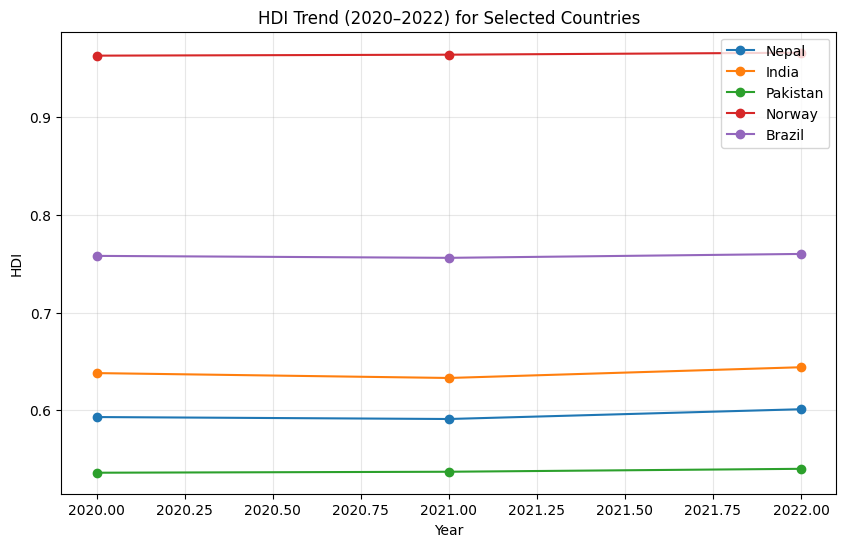

In [59]:
#3. Visualization Tasks:
# A. Line Chart — HDI Trend (Country-Level):
# Select any five countries (or five countries from a region of your choice).
countries = ['Nepal', 'India', 'Pakistan', 'Norway', 'Brazil']
df_line = df[
    (df['country'].isin(countries)) &
    (df['year'].between(2020, 2022))
]
# Plot HDI values for each country across the years 2020, 2021, and 2022.
# Ensure the chart includes appropriate axis labels, a legend, and an informative caption.
plt.figure(figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trend (2020–2022) for Selected Countries")

for country in countries:
    country_data = df_line[df_line['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [60]:
# B. Generate Visualizations:
# Bar Chart: Average HDI by Region (2020–2022)
# Group the dataset by Region and Year.
if 'region' in df.columns:
  # Compute the mean HDI for each region-year pair.
    df_region = df.groupby(['region', 'year'])['hdi'].mean().reset_index()

    # Plot a bar chart comparing average HDI across regions for each year.
    plt.figure(figsize=(12,6))
    # Label axes clearly and include a descriptive title.
    sns.barplot(data=df_region, x='region', y='hdi', hue='year')
    plt.title('Average HDI by Region (2020–2022)', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Average HDI', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()
else:
    print("Region column not found in the dataset.")

Region column not found in the dataset.


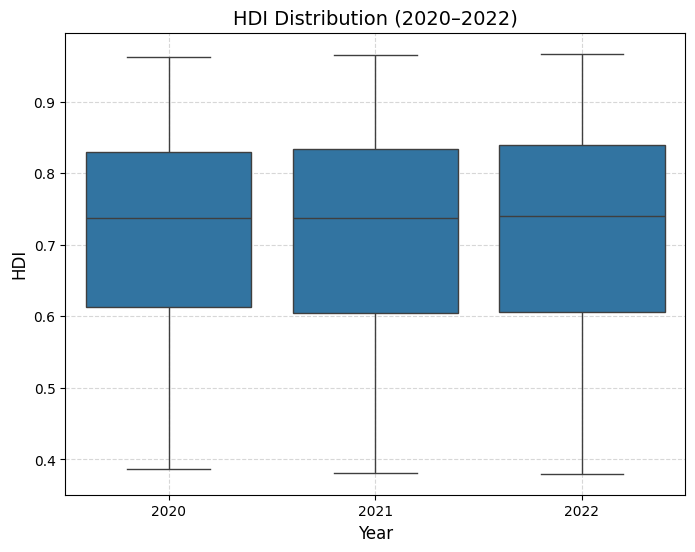

In [61]:
# Box Plot: HDI Distribution for 2020, 2021, and 2022
# Filter the dataset for the years 2020, 2021, and 2022.
df_years = df[df['year'].isin([2020, 2021, 2022])]
# Create a box plot showing HDI spread for each of the three years.
plt.figure(figsize=(8,6))
# Include titles and axis labels.
sns.boxplot(data=df_years, x='year', y='hdi')
plt.title('HDI Distribution (2020–2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('HDI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Comment briefly on distribution differences.
  # Box plot shows the spread and median HDI per year.
  # Compare medians and IQR to identify trends or anomalies.

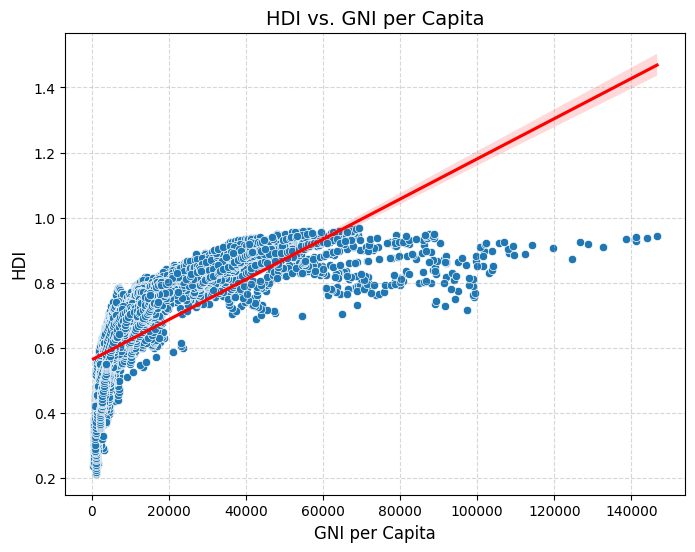

In [62]:
# Scatter Plot: HDI vs. GNI per Capita
# Check if the dataset contains a column for GNI per Capita.
if 'gross_inc_percap' in df.columns:
    plt.figure(figsize=(8,6))
    # If available:
    # Create a scatter plot using HDI as the dependent variable.
    # Use GNI per Capita on the x-axis.
    sns.scatterplot(data=df, x='gross_inc_percap', y='hdi')
    # Add a regression line (optional).
    sns.regplot(data=df, x='gross_inc_percap', y='hdi', scatter=False, color='red')
    plt.title('HDI vs. GNI per Capita', fontsize=14)
    plt.xlabel('GNI per Capita', fontsize=12)
    plt.ylabel('HDI', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
  # If the variable is missing, write:
  #"GNI per Capita variable not available in the dataset."
    print("GNI per Capita variable not available in the dataset.")

In [63]:
#4. Short Analysis Questions:
# Which countries show the greatest improvement in HDI from 2020 to 2022?
#Countries with the biggest increases in HDI values between 2020 and 2022 are those with the greatest improvement.

# Did any countries experience a decline in HDI? Provide possible reasons.
# yes, some countries did experience decline in HDI due to reduced life expectancy, economic recession, and contries with weaker health system was affected during COVID-19.

# Which region has the highest and lowest average HDI across these three years?
# the dataset doesnot have so the comparison cannot be supervised. the highest and lowest average HDI across these three years cannot be calulated.

# Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.
#Gobal events like COVID-19 pandemic has affected HDI trends having negative impacts in all three HDI dimensions (health, education, and income). Economic recession, low life expectancy, disturbance in education system may have affected HDI trends during this period.

Problem2
Advanced HDI Exploration
Objective:
Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detec-
tion, metric relationships, and gap analysis.

In [64]:
#1. Create South Asia Subset:
hdi_df = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv", encoding="latin1")
# Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"].
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# Filter the HDI dataset to include only these countries.
hdi_south_asia  = hdi_df[hdi_df['country'].isin(south_asia)]

print(hdi_south_asia .isnull().sum())
hdi_south_asia  = hdi_south_asia .dropna(subset=['hdi'])

cols_to_impute = [
    'hdi_f', 'hdi_m', 'gross_inc_percap' , 'gross_inc_percap_f', 'gross_inc_percap_m',
    'gender_development', 'gender_inequality', 'secondary_education_f_%',
    'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%',
    'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons',
    'mat_footprint_percap_tons'
]

for col in cols_to_impute:
    median_val = hdi_south_asia [col].median()
    hdi_south_asia [col] = hdi_south_asia [col].fillna(median_val)


# Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.
hdi_south_asia .to_csv("HDI_SouthAsia.csv", index=False)

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                          25
life_expectancy               0
pop_millions                  0
hdi_f                        43
hdi_m                        43
life_expec_f                  0
life_expec_m                  0
expec_yr_school               5
expec_yr_school_f             5
expec_yr_school_m             5
mean_yr_school               20
mean_yr_school_f             20
mean_yr_school_m             20
gross_inc_percap              0
gross_inc_percap_f           33
gross_inc_percap_m           33
gender_development           43
gender_inequality            38
secondary_education_f_%      20
secondary_education_m_%      20
seats_in_parliament_f_%      15
seats_in_parliament_m_%      15
labour_participation_f_%     33
labour_participation_m_%     33
co2_emission_tons             0
mat_footprint_percap_tons    33
dtype: int64


In [65]:
#2. Composite Development Score:
# Create a new metric called Composite Score using the formula:
#Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
hdi_south_asia ['Composite_Score'] = (
    0.30 * hdi_south_asia ['life_expectancy'] +
    0.30 * hdi_south_asia ['gross_inc_percap']
)
composite_rank = (
    hdi_south_asia
    .groupby('country')['Composite_Score']
    .mean()
    .sort_values(ascending=False)
)
composite_rank

,Composite_Score
country,
Maldives,4424.124746
Bhutan,2817.389815
Sri Lanka,2502.612949
Pakistan,1184.282350
India,1151.101140
Bangladesh,1042.583232
Nepal,779.209282
Afghanistan,555.454413


In [66]:
# Rank South Asian countries based on Composite Score.
hdi_rank = (
    hdi_south_asia
    .groupby('country')['hdi']
    .mean()
    .sort_values(ascending=False)
)

comparison = pd.DataFrame({
    'HDI_Rank': hdi_rank.rank(ascending=False),
    'Composite_Score_Rank': composite_rank.rank(ascending=False)
})


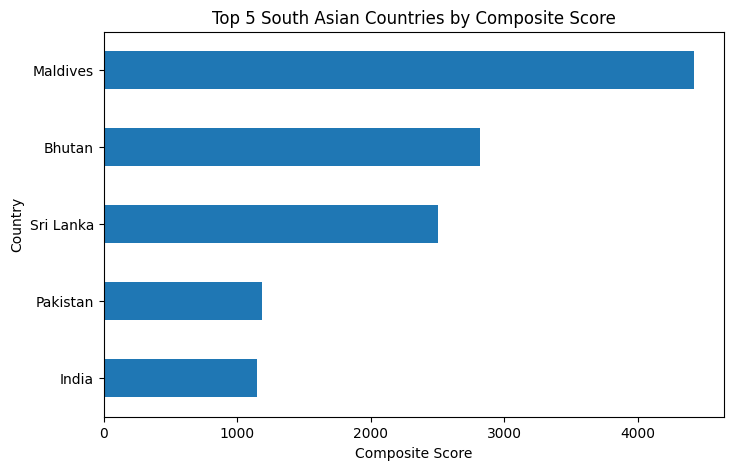

In [67]:
# Plot the top 5 countries in a horizontal bar chart.
top5 = composite_rank.head(5)
plt.figure(figsize=(8,5))
top5.sort_values().plot(kind='barh')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

In [68]:
#3. Outlier Detection:
outlier_df = hdi_south_asia [['country', 'hdi', 'gross_inc_percap']]
# Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]
hdi_outliers = detect_outliers(outlier_df['hdi'])
gni_outliers = detect_outliers(outlier_df['gross_inc_percap'])
print("HDI Outliers:\n", hdi_outliers)
print("GNI Outliers:\n", gni_outliers)

HDI Outliers:
 Series([], Name: hdi, dtype: float64)
GNI Outliers:
 3511    14543.14634
3512    15287.20714
3514    16391.40757
3515    14162.42816
3516    15423.81910
3517    14050.92438
3518    14363.23615
3519    15300.31364
3520    15355.44089
3521    15648.36655
3522    16410.16419
3523    16414.93039
3524    16911.45422
3525    17474.64201
3526    18055.72465
3527    18679.92536
3529    16857.60546
3530    18846.79219
Name: gross_inc_percap, dtype: float64


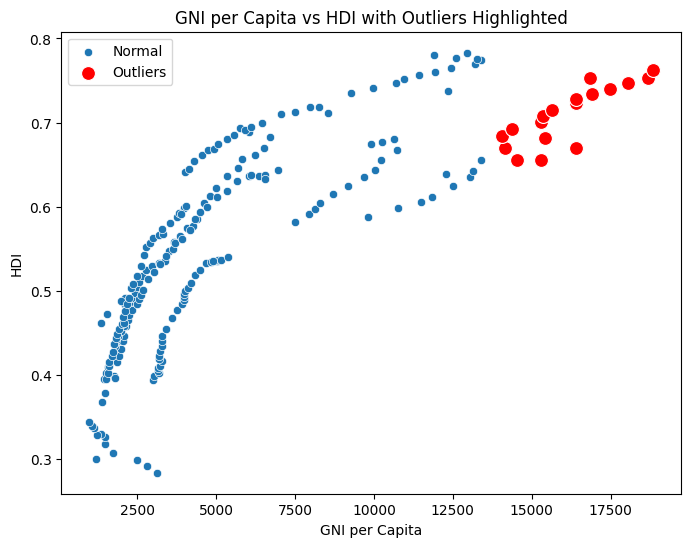

In [69]:
# Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
plt.figure(figsize=(8,6))
sns.scatterplot(x='gross_inc_percap', y='hdi', data=hdi_south_asia , label='Normal')
sns.scatterplot(x=hdi_south_asia .loc[gni_outliers.index, 'gross_inc_percap'],
                y=hdi_south_asia .loc[gni_outliers.index, 'hdi'], color='red', label='Outliers', s=100)
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('GNI per Capita vs HDI with Outliers Highlighted')
plt.legend()
plt.show()

Correlation between gender_development and HDI: 0.73
Correlation between life_expectancy and HDI: 0.96


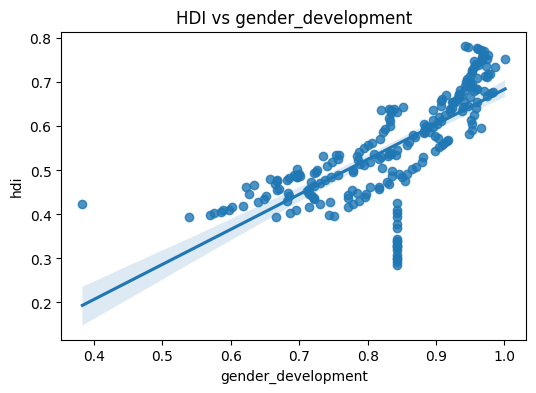

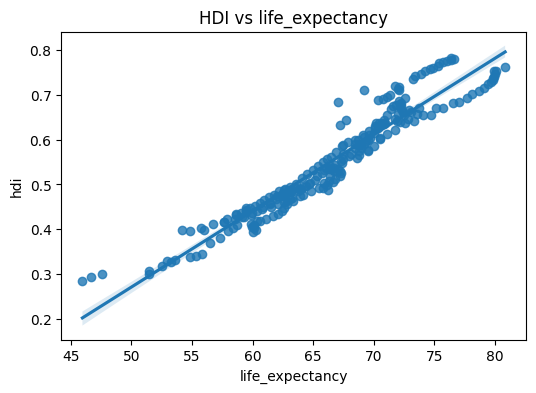

In [70]:
#4. Exploring Metric Relationships:
# Select two HDI components (e.g., Gender Development Index {"gender development"} and Life Expectancy Index {"life expectancy"}).
# Compute Pearson correlation of each metric with HDI.
metrics = ['gender_development', 'life_expectancy']
for m in metrics:
    corr = hdi_south_asia [m].corr(hdi_south_asia ['hdi'])
    print(f"Correlation between {m} and HDI: {corr:.2f}")
# Create scatter plots with trendlines to visualize the relationships.
for m in metrics:
    plt.figure(figsize=(6,4))
    sns.regplot(x=m, y='hdi', data=hdi_south_asia )
    plt.title(f'HDI vs {m}')
    plt.show()

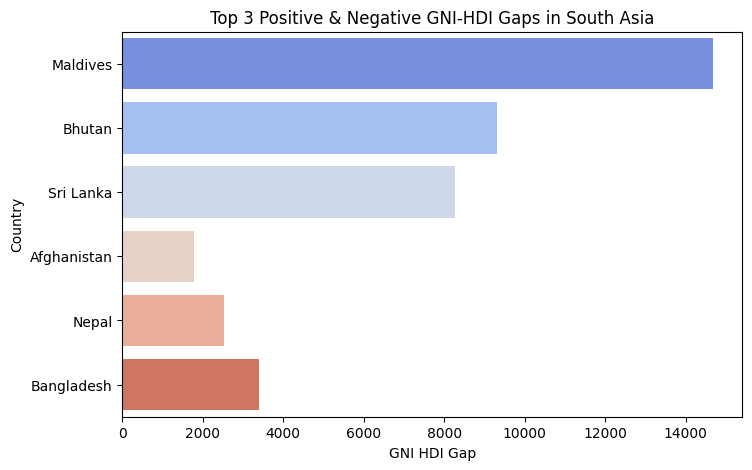

In [71]:
#5. Gap Analysis:
# Create a new metric:
#GNI HDI Gap = "gross inc percap" − "hdi"
hdi_south_asia  = hdi_south_asia .copy()
hdi_south_asia ['gni_hdi_gap'] = hdi_south_asia ['gross_inc_percap'] - hdi_south_asia ['hdi']
# Rank South Asian countries by GNI HDI Gap in descending and ascending order.
gap_desc = hdi_south_asia .sort_values('gni_hdi_gap', ascending=False)
gap_asc = hdi_south_asia .sort_values('gni_hdi_gap', ascending=True)

gap_desc = (
    hdi_south_asia
    .groupby('country')['gni_hdi_gap']
    .mean()
    .sort_values(ascending=False)
)
gap_asc = gap_desc.sort_values()

# Plot the top 3 positive gaps and top 3 negative gaps.
top_positive = gap_desc.head(3).reset_index()
top_negative = gap_asc.head(3).reset_index()

gap_plot_df = pd.concat([top_positive, top_negative], ignore_index=True)


plt.figure(figsize=(8,5))
sns.barplot(x='gni_hdi_gap',
    y='country',
    hue='country',
    data=gap_plot_df,
    palette='coolwarm',
    legend=False)
plt.title('Top 3 Positive & Negative GNI-HDI Gaps in South Asia')
plt.xlabel('GNI HDI Gap')
plt.ylabel('Country')
plt.show()

Problem 3
Comparative Regional Analysis: South Asia vs Middle East
Objective:
Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using
the 2020–2022 dataset from Problem 1B.

In [72]:
#1. Create Middle East Subset:
hdi_df = pd.read_csv("HDI_problem1B.csv")
# Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"].
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
# Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and Middle East.
hdi_south_asia  = hdi_df[hdi_df['country'].isin(south_asia_countries)]
hdi_middle_east = hdi_df[hdi_df['country'].isin(middle_east_countries)]
# Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for use in subsequent tasks.
hdi_south_asia .to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
hdi_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

In [73]:
#2. Descriptive Statistics:
# Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East) across 2020–2022.
# Mean and std for HDI
mean_hdi_south_asia  = hdi_south_asia ['hdi'].mean()
std_hdi_south_asia  = hdi_south_asia ['hdi'].std()

mean_hdi_middle_east = hdi_middle_east['hdi'].mean()
std_hdi_middle_east = hdi_middle_east['hdi'].std()

print(f"South Asia - Mean HDI: {mean_hdi_south_asia :.3f}, Std HDI: {std_hdi_south_asia :.3f}")
print(f"Middle East - Mean HDI: {mean_hdi_middle_east:.3f}, Std HDI: {std_hdi_middle_east:.3f}")

# Identify which region performs better on average.
if mean_hdi_south_asia  > mean_hdi_middle_east:
    print("South Asia performs better on average.")
else:
    print("Middle East performs better on average.")

South Asia - Mean HDI: 0.640, Std HDI: 0.098
Middle East - Mean HDI: 0.789, Std HDI: 0.141
Middle East performs better on average.


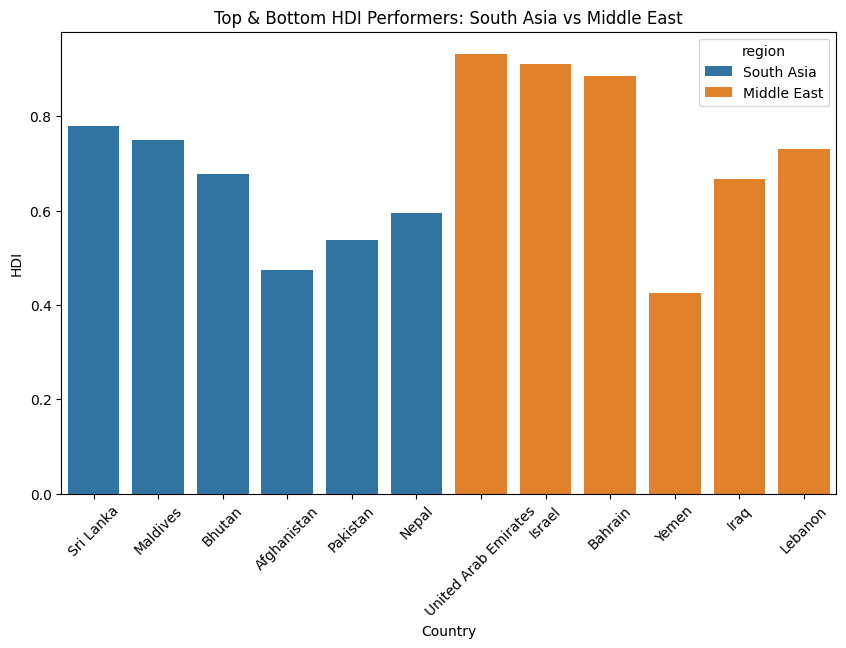

In [74]:
#3. Top and Bottom Performers:
# Identify the top 3 and bottom 3 countries in each region based on HDI.
hdi_south_asia_avg = hdi_south_asia.groupby('country')['hdi'].mean().reset_index()
hdi_middle_east_avg = hdi_middle_east.groupby('country')['hdi'].mean().reset_index()

def top_bottom(df, n=3):
    top = df.nlargest(n, 'hdi')[['country','hdi']]
    bottom = df.nsmallest(n, 'hdi')[['country','hdi']]
    return top, bottom

sa_top, sa_bottom = top_bottom(hdi_south_asia_avg)
me_top, me_bottom = top_bottom(hdi_middle_east_avg)

# Combine for plotting
plot_df = pd.concat([sa_top.assign(region='South Asia'),
                           sa_bottom.assign(region='South Asia'),
                           me_top.assign(region='Middle East'),
                           me_bottom.assign(region='Middle East')])

# Create a bar chart comparing these top and bottom performers across the two regions.
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x="country", y="hdi", hue="region")
plt.xticks(rotation=45)
plt.title('Top & Bottom HDI Performers: South Asia vs Middle East')
plt.xlabel('Country')
plt.ylabel('HDI')
plt.legend(title='region')
# plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

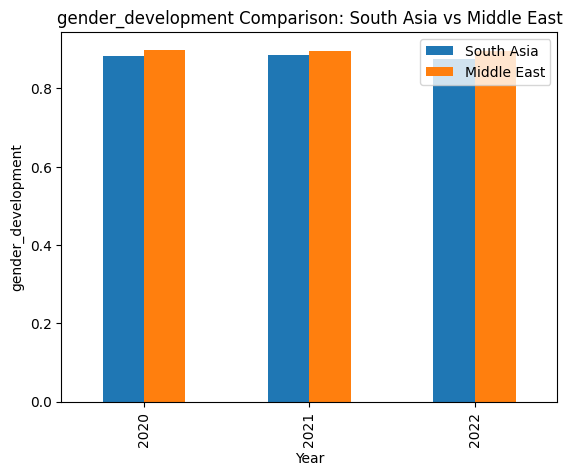

<Figure size 1000x500 with 0 Axes>

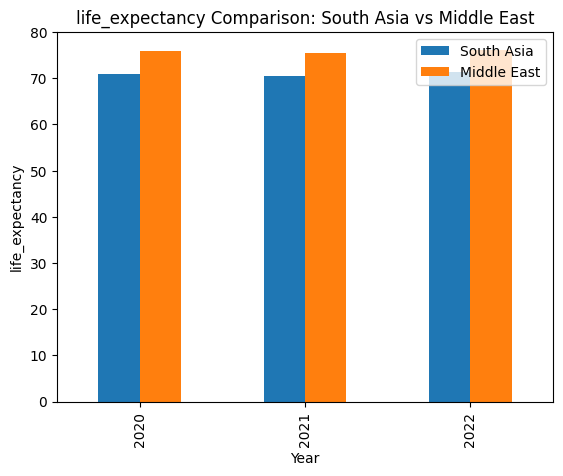

<Figure size 1000x500 with 0 Axes>

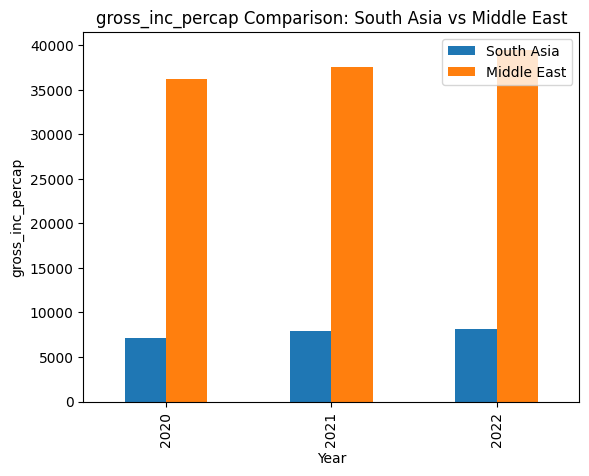

In [75]:
#4. Metric Comparisons:
# Compare the following metrics across regions using grouped bar charts:
# Gender Development Index {"gender development"}
# Life Expectancy Index {"life expectancy"}
# GNI per Capita Index {"gross inc percap"}
# Identify which metric shows the greatest disparity between regions.
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

for metric in metrics:
    plt.figure(figsize=(10,5))
    mean_values = pd.DataFrame({
        'South Asia': hdi_south_asia .groupby('year')[metric].mean(),
        'Middle East': hdi_middle_east.groupby('year')[metric].mean()
    })
    mean_values.plot(kind='bar')
    plt.title(f'{metric} Comparison: South Asia vs Middle East')
    plt.ylabel(metric)
    plt.xlabel('Year')
    plt.show()

In [76]:
#5. HDI Disparity:
for region, df in [("South Asia", hdi_south_asia ), ("Middle East", hdi_middle_east)]:
    # Compute the range (max – min) of HDI for each region.
    hdi_range = df['hdi'].max() - df['hdi'].min()
    # Compute the coefficient of variation (CV = std/mean) for HDI.
    hdi_cv = df['hdi'].std() / df['hdi'].mean()
    # Identify which region exhibits more variation in HDI.
    print(f"{region} - HDI Range: {hdi_range:.3f}, Coefficient of Variation: {hdi_cv:.3f}")

South Asia - HDI Range: 0.321, Coefficient of Variation: 0.154
Middle East - HDI Range: 0.513, Coefficient of Variation: 0.179



Correlation Analysis for South Asia:
Correlation between HDI and gender_development: 0.87


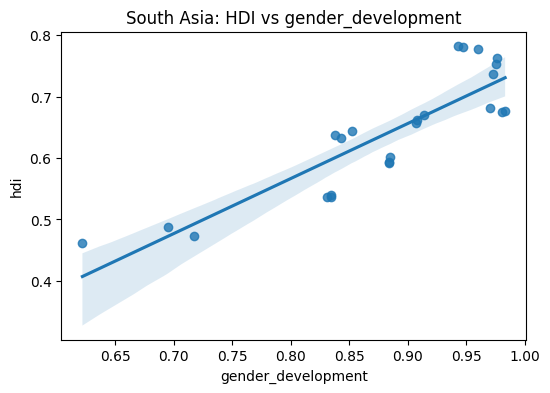

Correlation between HDI and life_expectancy: 0.94


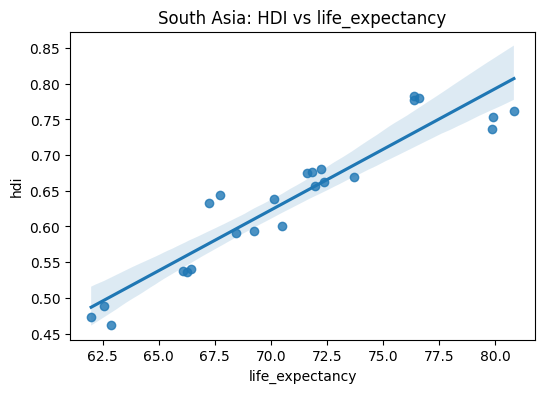


Correlation Analysis for Middle East:
Correlation between HDI and gender_development: 0.94


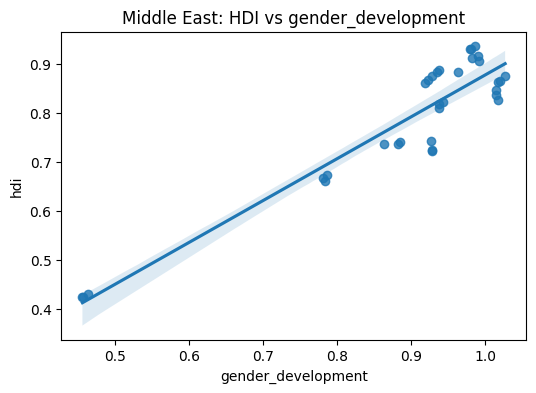

Correlation between HDI and life_expectancy: 0.93


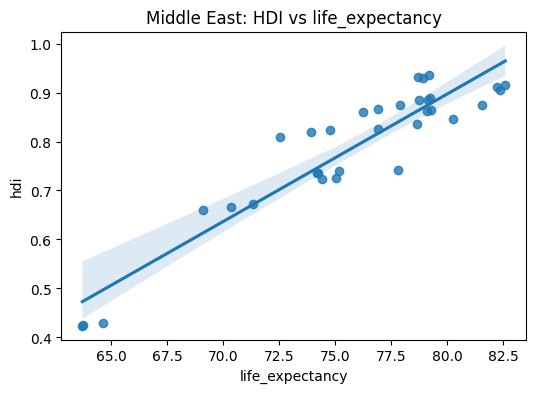

In [77]:
#6. Correlation Analysis:
# For each region, compute correlations of HDI with:
# Gender Development Index
# Life Expectancy Index
corr_metrics = ['gender_development', 'life_expectancy']

for region_name, df in [("South Asia", hdi_south_asia ), ("Middle East", hdi_middle_east)]:
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in corr_metrics:
        corr = df['hdi'].corr(df[metric])
        print(f"Correlation between HDI and {metric}: {corr:.2f}")

        # Create scatter plots with trendlines for each correlation.
        plt.figure(figsize=(6,4))
        sns.regplot(x=metric, y='hdi', data=df)
        plt.title(f'{region_name}: HDI vs {metric}')
        plt.show()

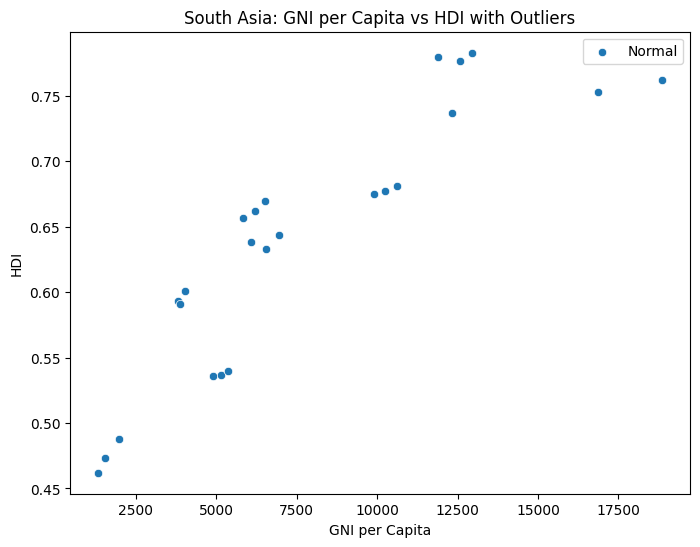

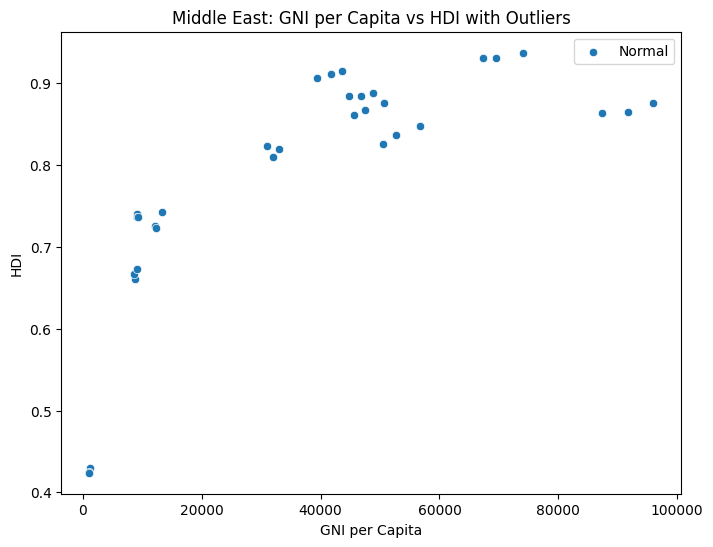

In [78]:
#7. Outlier Detection:
# Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using the 1.5 × IQR rule.
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]
# Create scatter plots highlighting outliers in a different color.
for region_name, df in [("South Asia", hdi_south_asia ), ("Middle East", hdi_middle_east)]:
    hdi_outliers = detect_outliers(df['hdi'])
    gni_outliers = detect_outliers(df['gross_inc_percap'])

    plt.figure(figsize=(8,6))
    sns.scatterplot(x='gross_inc_percap', y='hdi', data=df, label='Normal')
    sns.scatterplot(x=df.loc[gni_outliers.index, 'gross_inc_percap'],
                    y=df.loc[gni_outliers.index, 'hdi'], color='red', label='Outliers', s=100)
    plt.title(f'{region_name}: GNI per Capita vs HDI with Outliers')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI')
    plt.legend()
    plt.show()